In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn import metrics, svm
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import joblib

In [4]:
df = pd.read_csv('datasets/credit_clients.csv')

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month,BILL_AMT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1,1284.000000
1,120000,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1,2846.166667
2,90000,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0,16942.166667
3,50000,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0,38555.666667
4,50000,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0,18223.166667


In [5]:
# let's check the distribution of the target variable
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [6]:
X = df.drop('default payment next month', axis=1)  
y = df['default payment next month']

In [7]:
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   

In [9]:
#model = make_pipeline(MinMaxScaler(), svm.SVC(probability=True))
#model.fit(X_train, y_train)

In [34]:
# let's Scale the data
#scaler = MinMaxScaler() 
#X = scaler.fit_transform(X)

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [35]:
pipeline = make_pipeline(scaler, SVC(probability=True, random_state=42))

In [23]:
param_grid = {
    'svc__C': [1, 1.25, 1.5, 2],
    'svc__gamma': [0.0001, 0.001, 0.01],
    'svc__kernel': ['rbf']
}

In [24]:
model = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, n_jobs=-1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 1.25, 1.5, 2],
                         'svc__gamma': [0.0001, 0.001, 0.01],
                         'svc__kernel': ['rbf']},
             verbose=2)

In [25]:
model.score(X_test, y_test)

0.7046710195881467

In [38]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
forecast = model.predict(X_test)

In [28]:
print("Best Accuracy for Training Data: {:.2f}%".format(train_score * 100))
print("Test Accuracy for Testing Data: {:.2f}%".format(test_score * 100))
print("\nClassification Report:\n", classification_report(y_test, forecast))

Best Accuracy for Training Data: 70.13%
Test Accuracy for Testing Data: 70.47%

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.85      0.74      2010
           1       0.78      0.56      0.65      1972

    accuracy                           0.70      3982
   macro avg       0.72      0.70      0.70      3982
weighted avg       0.72      0.70      0.70      3982



<Axes: >

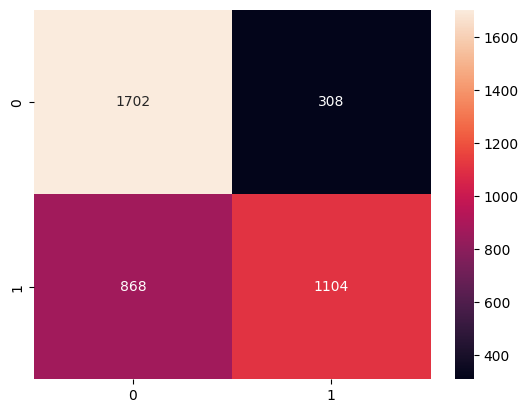

In [29]:
sns.heatmap(confusion_matrix(y_test, forecast), annot=True, fmt='g')

## <span style="color: #20C997;">Personal Analysis</span>
SVC got the same result as linear regression, and high precision for class 1 but lower for class 0 while it has higher recall for 0 class but lower for 1.

In [31]:
# I need to save only the model because scaler is already included in the pipeline and pipeline is saved with the model.
joblib.dump(model,'datasets/best_svc.pkl', compress = 1)

['datasets/best_svc.pkl']

In [33]:
# Define test data
test = pd.DataFrame({
    'LIMIT_BAL': [200000],
    'SEX': [1],
    'EDUCATION': [2],
    'MARRIAGE': [1],
    'AGE': [35],
    'PAY_SEP': [0],
    'PAY_AUG': [0],
    'PAY_JUL': [0],
    'PAY_JUN': [0],
    'PAY_MAY': [0],
    'PAY_APR': [0],
    'PAY_AMT_SEP': [5000],
    'PAY_AMT_AUG': [5000],
    'PAY_AMT_JUL': [5000],
    'PAY_AMT_JUN': [5000],
    'PAY_AMT_MAY': [5000],
    'PAY_AMT_APR': [5000],
    'BILL_AMT': [20000],
})

# Predict probabilities
probabilities = model.predict_proba(test)
print("All probabilities by category:")
print(probabilities)

# Correctly define the labels
labels = ['Did not default (No)', 'Defaulted (Yes)']

# Predict the label
result = labels[int(model.predict(test)[0])]

print("\nThe customer defaulted on their payment (Yes/No):")
print(result)


All probabilities by category:
[[0.63120165 0.36879835]]

The customer defaulted on their payment (Yes/No):
Did not default (No)
